<a href="https://colab.research.google.com/github/Anjasfedo/eceg-lsb-lzw-huffman/blob/main/image_compression_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from PIL import Image
import io
import numpy as np

# URL to the raw image file
url = "https://raw.githubusercontent.com/mikolalysenko/lena/master/lena.png"

# Download the image
response = requests.get(url)
if response.status_code == 200:
    # Load the image using PIL
    lena_image = Image.open(io.BytesIO(response.content))
    lena_image.show()  # Display the image (optional)
    lena_image.save("lena.png")  # Save the image locally
else:
    print("Failed to download the image.")

In [2]:
import os
LENA_IMG = 'lena.png'

if not os.path.exists(LENA_IMG):
    raise FileNotFoundError(f"Image not found at {LENA_IMG}")

In [7]:

import os
import zlib
from PIL import Image

def get_file_size(file_path):
    """Return the file size in kilobytes."""
    size_in_bytes = os.path.getsize(file_path)
    return size_in_bytes / 1024  # Convert to KB

def compress_image_with_zlib(input_path, output_path):
    """Compress an image using zlib."""
    with open(input_path, "rb") as img_file:
        binary_data = img_file.read()

    # Compress the binary data
    compressed_data = zlib.compress(binary_data)

    # Save compressed data to a file
    with open(output_path, "wb") as compressed_file:
        compressed_file.write(compressed_data)

def decompress_image_with_zlib(input_path, output_path):
    """Decompress a zlib-compressed image."""
    with open(input_path, "rb") as compressed_file:
        decompressed_data = zlib.decompress(compressed_file.read())

    # Save the decompressed data back as an image
    with open(output_path, "wb") as decompressed_file:
        decompressed_file.write(decompressed_data)


--2025-02-09 13:56:10--  https://via.placeholder.com/1024
Resolving via.placeholder.com (via.placeholder.com)... failed: Name or service not known.
wget: unable to resolve host address ‘via.placeholder.com’


In [10]:
# Convert the sample image to PNG (lossless format) using Pillow
input_image = "lena.png"
lossless_image = "lena_lossless.png"
Image.open(input_image).save(lossless_image, format="PNG")

# Step 5: Apply zlib compression
zlib_compressed_file = "lena_compressed.zlib"
compress_image_with_zlib(lossless_image, zlib_compressed_file)

# Step 6: Decompress the image to verify
decompressed_image = "lena_decompressed.png"
decompress_image_with_zlib(zlib_compressed_file, decompressed_image)

# Step 7: Show file size differences
print(f"Original PNG size: {get_file_size(input_image):.2f} KB")
print(f"Lossless PNG size: {get_file_size(lossless_image):.2f} KB")
print(f"zlib compressed file size: {get_file_size(zlib_compressed_file):.2f} KB")
print(f"Decompressed PNG size: {get_file_size(decompressed_image):.2f} KB")

# Verify if decompressed image matches the original
print("Files are identical:", Image.open(lossless_image).tobytes() == Image.open(decompressed_image).tobytes())


Original PNG size: 468.53 KB
Lossless PNG size: 468.53 KB
zlib compressed file size: 468.68 KB
Decompressed PNG size: 468.53 KB
Files are identical: True


In [11]:
!pip install zopflipng

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.0/158.0 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for zopflipng: filename=zopflipng-1.1.1-cp311-cp311-linux_x86_64.whl size=758518 sha256=4f822b7903f91a872d2b5dbd450648f2e88efdbd3da91400233d3e83ad92ea1a
  Stored in directory: /root/.cache/pip/wheels/f7/08/f2/1c7544176353dbfeb8cd7bc29af1d6f50791dab2d9638bfb7e
Successfully built zopflipng


In [12]:
# a simple example, using the default configuration

from zopflipng import png_optimize

data = open('lena.png', 'rb').read()
result, code = png_optimize(data)
# if code ==0 ,png compression success
if code == 0:
   # save png
   with open('result.png','wb') as f:
       f.write(result)
       f.close()

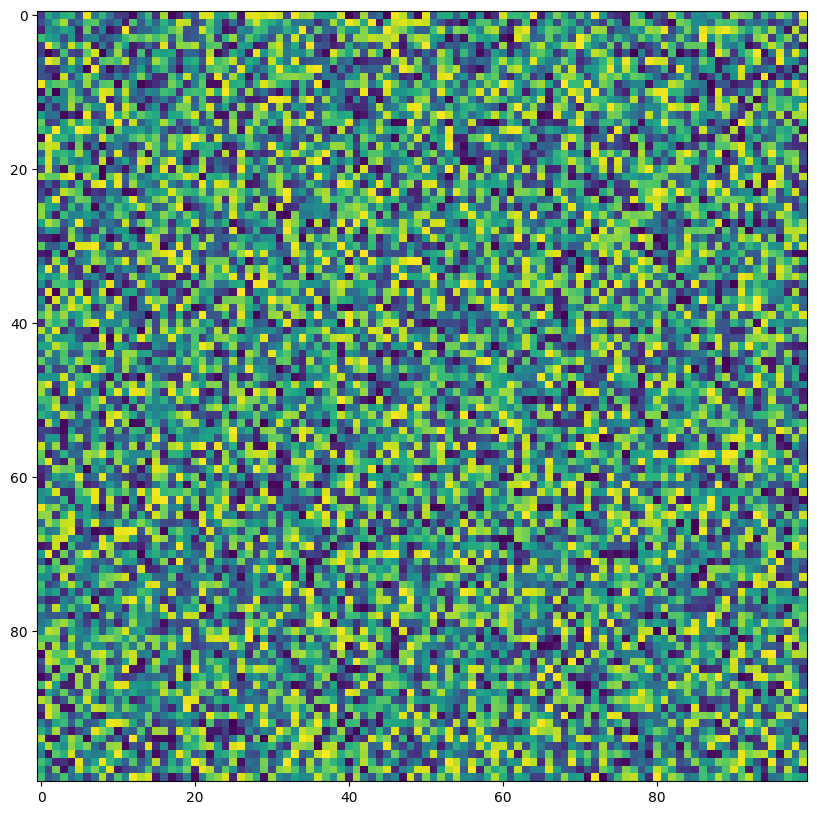

In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sys
import os

def show(img, figsize=(10, 10), title="Image"):
    figure=plt.figure(figsize=figsize)

    plt.imshow(img)
    plt.show()

dummy = np.random.randint(0, 255, (100, 100)).astype(np.uint8)
show(dummy)

In [14]:
# see how much storage is taken by the dummy array
sys.getsizeof(dummy)/1024


9.890625

In [15]:
# write a image in jpg
cv2.imwrite("d.png", dummy)


True

In [16]:
# read it back as grayscale
img = cv2.imread("d.png", 0)

# see its size
sys.getsizeof(img)/1024

9.890625

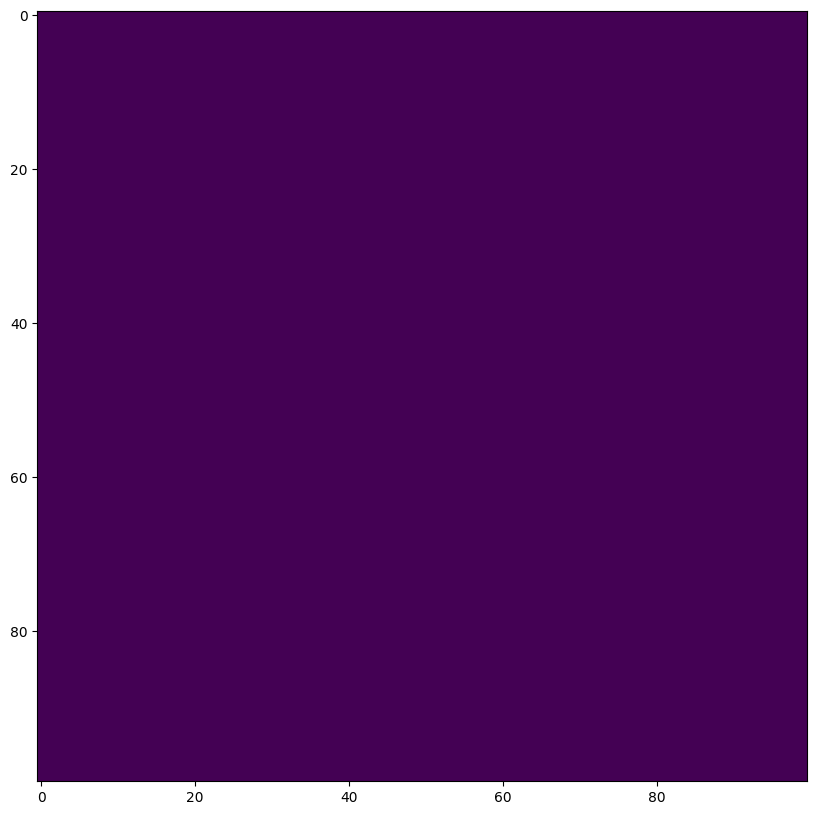

In [17]:
dd = np.zeros((100, 100)).astype(np.uint8)
show(dd)


In [18]:
sys.getsizeof(dd)/1024


9.890625

In [19]:
cv2.imwrite("dd.png", dd)


True

In [20]:
def get_size(filename="dd.png"):
    stat = os.stat(filename)
    size=stat.st_size
    return size

print(get_size())

print(get_size("d.png"))


214
10180


In [26]:
import requests
from PIL import Image
import io
import numpy as np

# URL to the raw image file
url = "https://q-viper.github.io/assets/rle/bg20.PNG"

# Download the image
response = requests.get(url)
if response.status_code == 200:
    # Load the image using PIL
    bg20_image = Image.open(io.BytesIO(response.content))
    bg20_image.show()  # Display the image (optional)
    bg20_image.save("bg20.png")  # Save the image locally
else:
    print("Failed to download the image.")

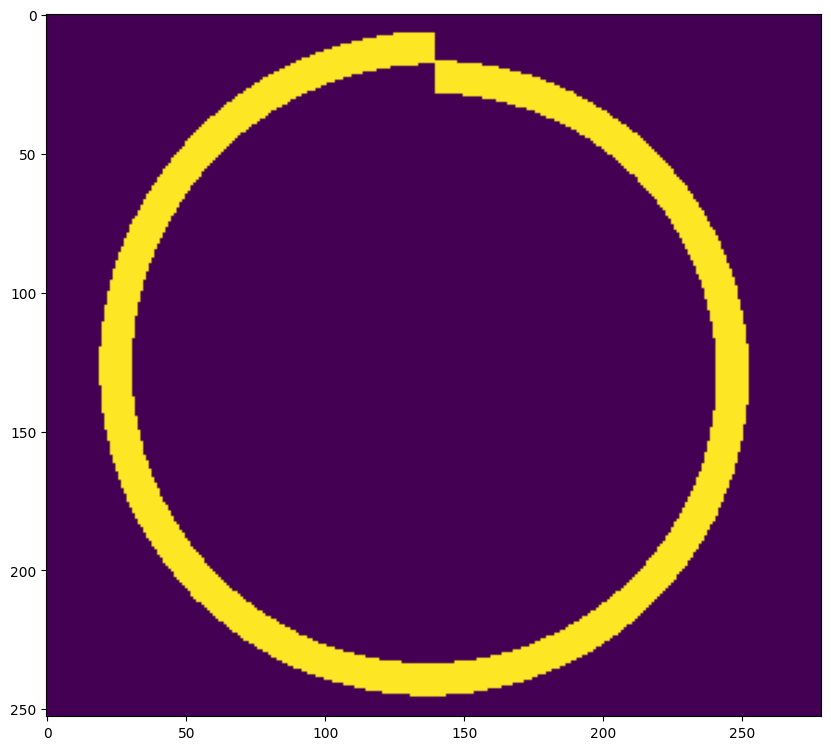

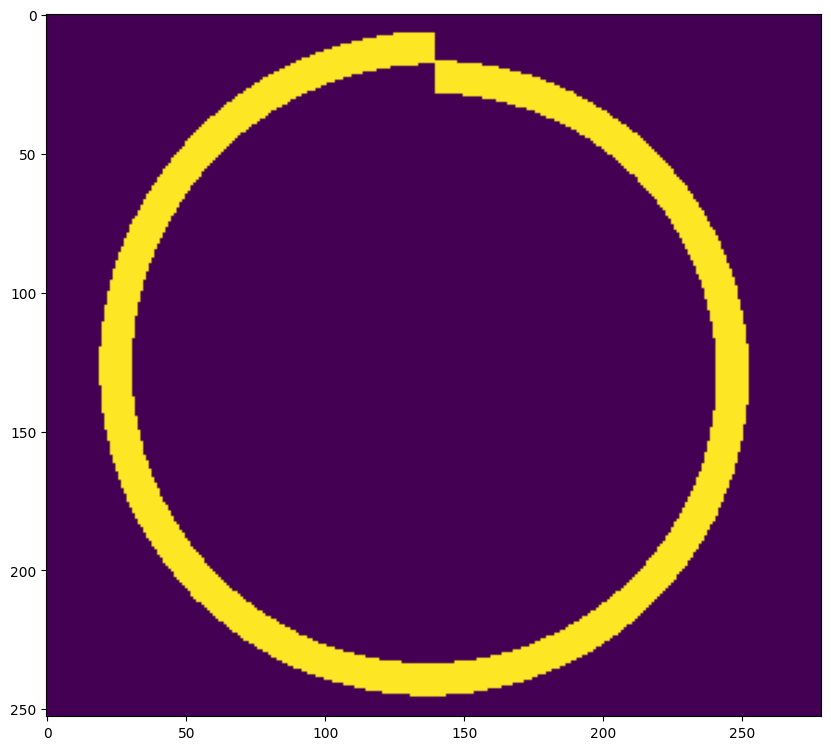

array([[255,   0],
       [255,   0],
       [255,   0],
       ...,
       [255,   0],
       [255,   0],
       [ 48,   0]])

In [27]:
# read graysclae img
def RLE_encoding(img, bits=8,  binary=True, view=True):
    """
    img: Grayscale img.
    bits: what will be the maximum run length? 2^bits
    """
    if binary:
        ret,img = cv2.threshold(img,127,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    if view:
        show(img)

    encoded = []
    shape=img.shape
    count = 0
    prev = None
    fimg = img.flatten()
    th=127
    for pixel in fimg:
        if binary:
            if pixel<th:
                pixel=0
            else:
                pixel=1
        if prev==None:
            prev = pixel
            count+=1
        else:
            if prev!=pixel:
                encoded.append((count, prev))
                prev=pixel
                count=1
            else:
                if count<(2**bits)-1:
                    count+=1
                else:
                    encoded.append((count, prev))
                    prev=pixel
                    count=1
    encoded.append((count, prev))

    return np.array(encoded)
fpath="bg20.png"
img = cv2.imread(fpath, 0)
shape=img.shape
encoded = RLE_encoding(img, bits=8)
encoded
# read graysclae img
def RLE_encoding(img, bits=8,  binary=True, view=True):
    """
    img: Grayscale img.
    bits: what will be the maximum run length? 2^bits
    """
    if binary:
        ret,img = cv2.threshold(img,127,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    if view:
        show(img)

    encoded = []
    shape=img.shape
    count = 0
    prev = None
    fimg = img.flatten()
    th=127
    for pixel in fimg:
        if binary:
            if pixel<th:
                pixel=0
            else:
                pixel=1
        if prev==None:
            prev = pixel
            count+=1
        else:
            if prev!=pixel:
                encoded.append((count, prev))
                prev=pixel
                count=1
            else:
                if count<(2**bits)-1:
                    count+=1
                else:
                    encoded.append((count, prev))
                    prev=pixel
                    count=1
    encoded.append((count, prev))

    return np.array(encoded)
fpath="bg20.png"
img = cv2.imread(fpath, 0)
shape=img.shape
encoded = RLE_encoding(img, bits=8)
encoded


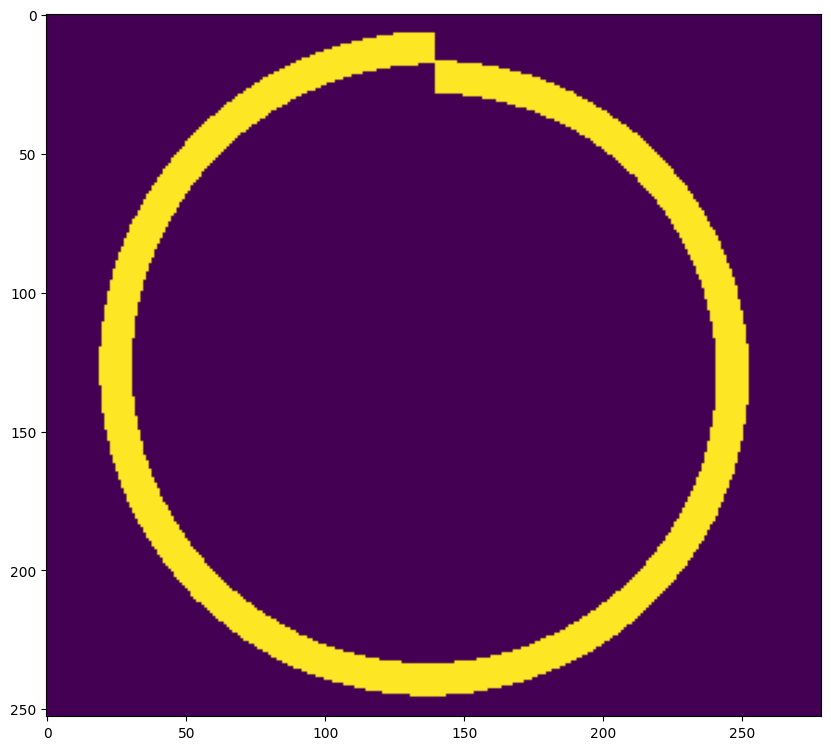

In [28]:
# decode
def RLE_decode(encoded, shape):
    decoded=[]
    for rl in encoded:
        r,p = rl[0], rl[1]
        decoded.extend([p]*r)
    dimg = np.array(decoded).reshape(shape)
    return dimg

dimg = RLE_decode(encoded, shape)
show(dimg)


In [29]:
# save the encoded list into npz array file
earr=np.array(encoded)
# earr=earr.astype(np.uint8)
np.savez("np1.npz", earr)
np.save("np2.npz", earr)


In [30]:
# store that array as image
# the earr has shape of (x, 2) which can work fine as an image.
cv2.imwrite("encoded.tif", earr)
cv2.imwrite("encoded.png", earr)


True

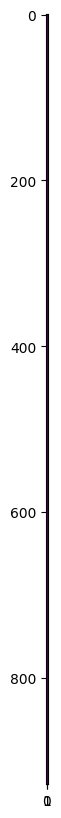

In [31]:
show(earr)


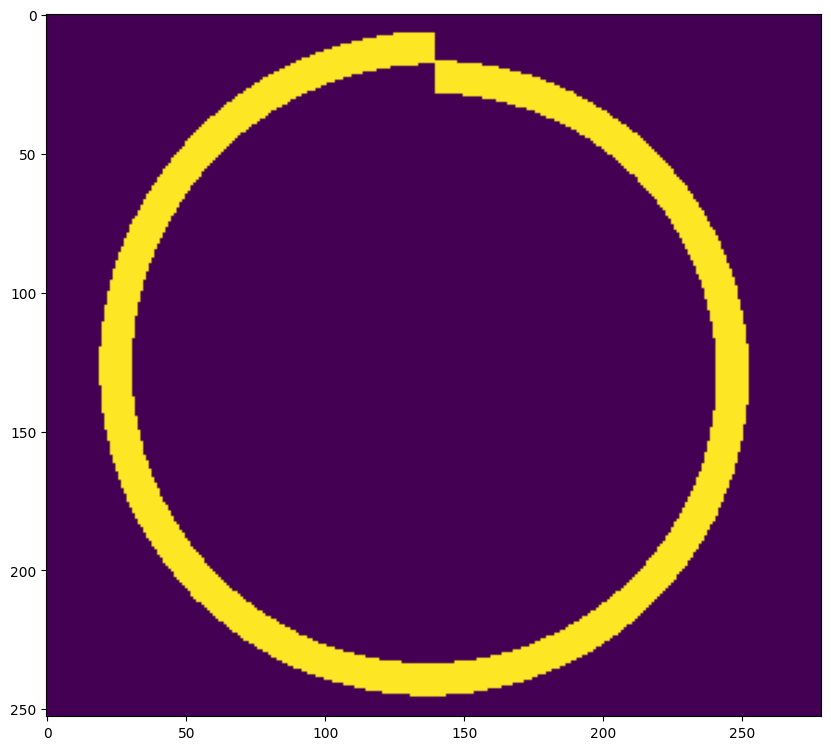

In [32]:
rencd = cv2.imread("encoded.tif", -1)
show(RLE_decode(rencd, shape))


In [33]:
# now check size of each files
files = ["encoded.png", "encoded.tif", "np1.npz", "np2.npz.npy"]
for f in files:
    print(f"File: {f} => Size: {get_size(f)} Bytes")


File: encoded.png => Size: 2087 Bytes
File: encoded.tif => Size: 3104 Bytes
File: np1.npz => Size: 15128 Bytes
File: np2.npz.npy => Size: 14992 Bytes


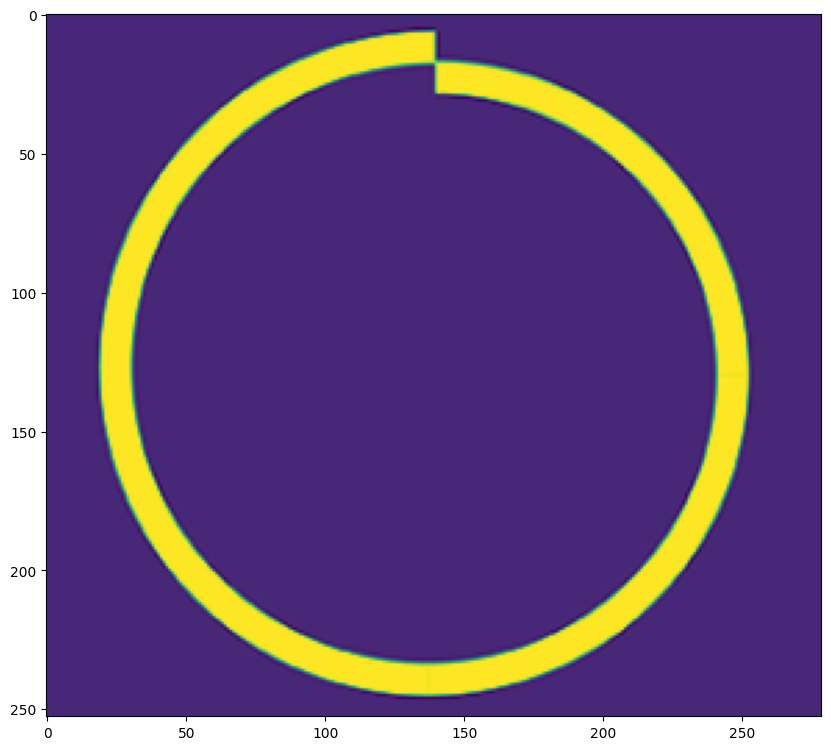

In [34]:
fpath="bg20.png"
img = cv2.imread(fpath, 0)
shape=img.shape
encoded = RLE_encoding(img, bits=8, binary=False)


In [35]:
# save the encoded list into npz array file
earr=np.array(encoded)
# earr=earr.astype(np.uint8)
np.savez("np11.npz", earr)
np.save("np22.npz", earr)

# store that array as image
# the earr has shape of (x, 2) which can work fine as an image.
cv2.imwrite("encoded1.tif", earr)
cv2.imwrite("encoded1.png", earr)


True

In [36]:
# now check size of each files
files = ["encoded1.png", "encoded1.tif", "np11.npz", "np22.npz.npy"]
for f in files:
    print(f"File: {f} => Size: {get_size(f)} Bytes")


File: encoded1.png => Size: 9260 Bytes
File: encoded1.tif => Size: 14282 Bytes
File: np11.npz => Size: 102472 Bytes
File: np22.npz.npy => Size: 102336 Bytes


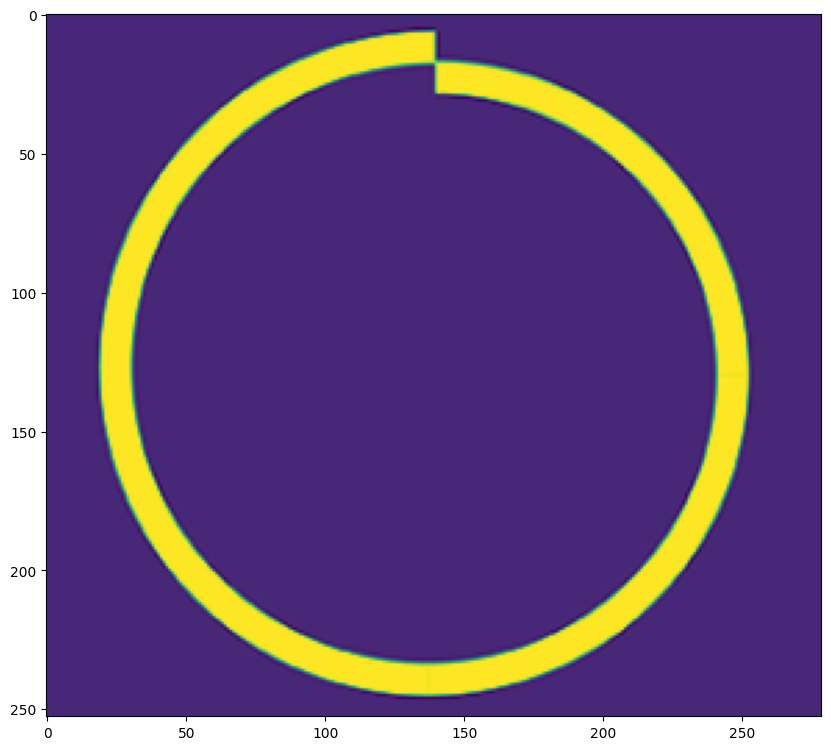

In [37]:
rencd = cv2.imread("encoded1.tif", -1)
show(RLE_decode(rencd, shape))
